# We are required to predict the median housing price for each district using different features

In [1]:
# imports
import numpy as np
import pandas as pd
import os

# making the notebook's run stable across all platforms
np.random.seed(42)


#to plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# ignore useless warnings
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')


#get the data
housing = pd.read_csv('housing.csv')

In [2]:
# quick look at the data
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

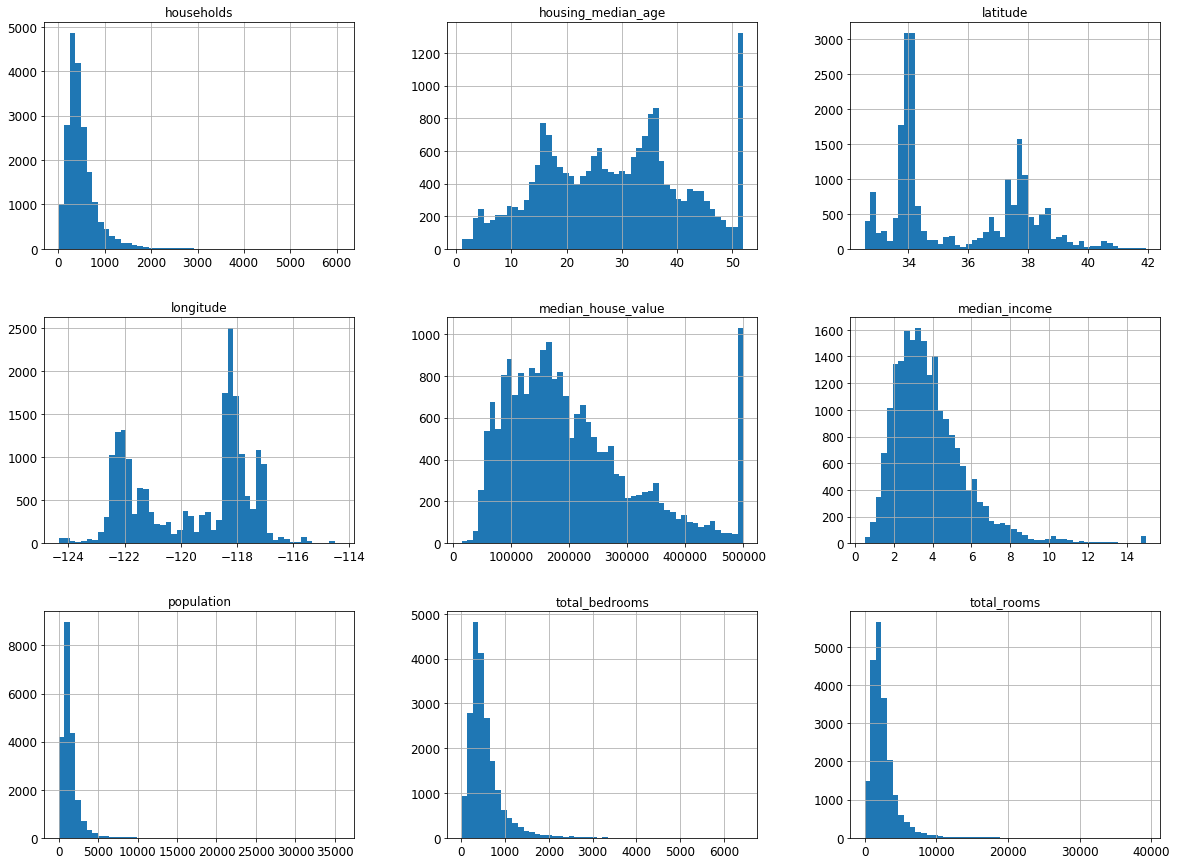

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

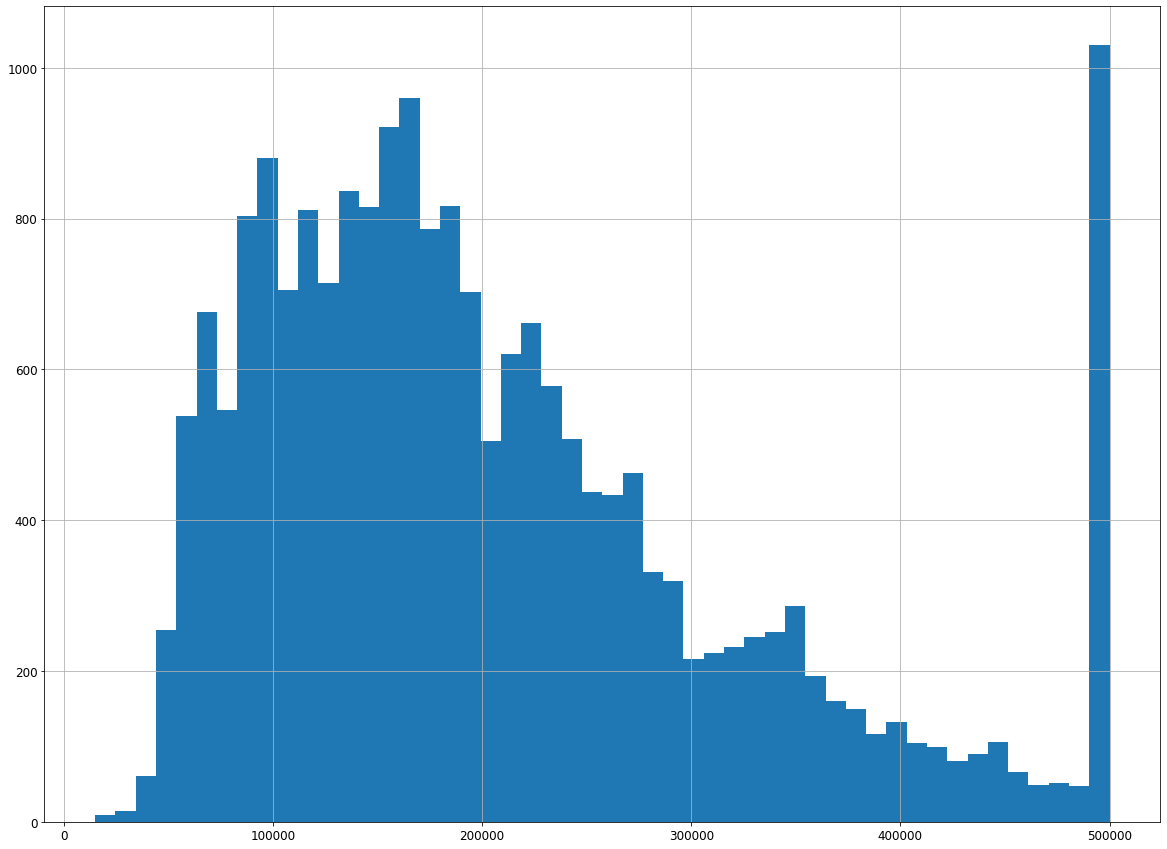

In [9]:
housing['median_house_value'].hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# other plots
#check if some attributes were capped annd either collect proper labels for them or remove the capped labels from both the training and test set
# check if the attributes have different scales and use feature scaling to take care of this
#check if the histograms are tail-heavy(extend much further to the right of the median than to the left. Try transforming these attributes to have more bell-shaped distributions
#


In [11]:
# create a test set

In [12]:
# a good implementation

# from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
# another good implementation (using hash function)
# import hashlib
# def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#     return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [14]:
# housing_with_id = housing.reset_index()   # adds an `index` column
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
# using sklearn's purely random sampling methods. This is generally fine if
# your dataset is large enough (especially relative to the number of attributes), but if it
# is not, you run the risk of introducing a significant sampling bias.

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


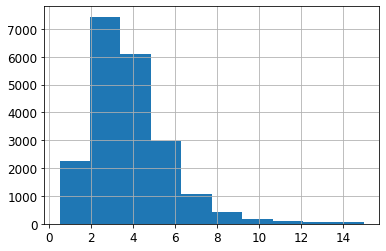

In [18]:
housing['median_income'].hist()

In [19]:
# creating an income category to handle the median income price, which is the most important determinant of median hose price

In [20]:
# Divide by 1.5 to limit the number of income categories
# housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# # Label those above 5 as 5
# housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [21]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [22]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

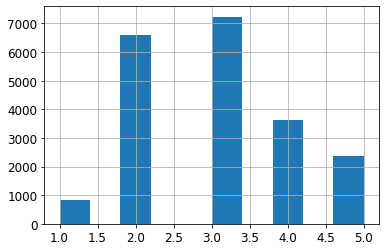

In [23]:
housing["income_cat"].hist()

In [24]:
# Now we are ready to do stratified sampling based on the income category. For this
# we can use Scikit-Learn’s StratifiedShuffleSplit class:

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [27]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [30]:
# With similar code you can measure the income category proportions in the test set.
# The table above compares the income category proportions in the overall dataset, in the
# test set generated with stratified sampling, and in a test set generated using purely
# random sampling. As you can see, the test set generated using stratified sampling has
# income category proportions almost identical to those in the full dataset, whereas the
# test set generated using purely random sampling is quite skewed.

In [31]:
# We have been able to use Stratified Sampling to divide the population into homogenous 
# subgroups called strata, and the right number of instances is sampled from each stratum
# to guarantee the test set is representative of the overall population.

# If you use purely random sampling, there is a high chance of sampling a skewed test set

In [32]:
# We spent quite a bit of time on test set generation for a good reason: this is an often
# neglected but critical part of a Machine Learning project. Moreover, many of these
# ideas will be useful later when we discuss cross-validation. Now it’s time to move on
# to the next stage: exploring the data.

# Discover and visualize the data to gain insights

In [33]:
housing = strat_train_set.copy()

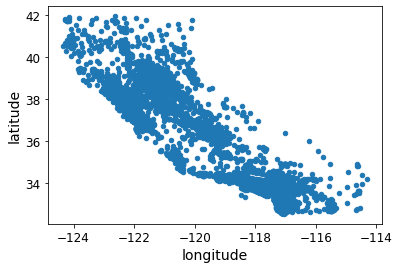

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude")


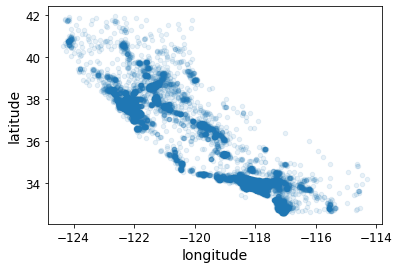

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


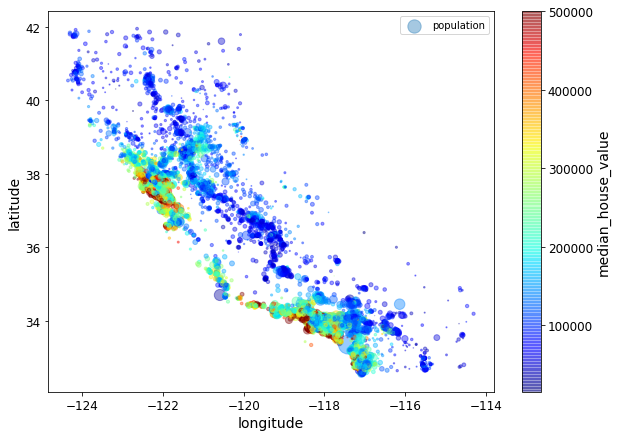

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

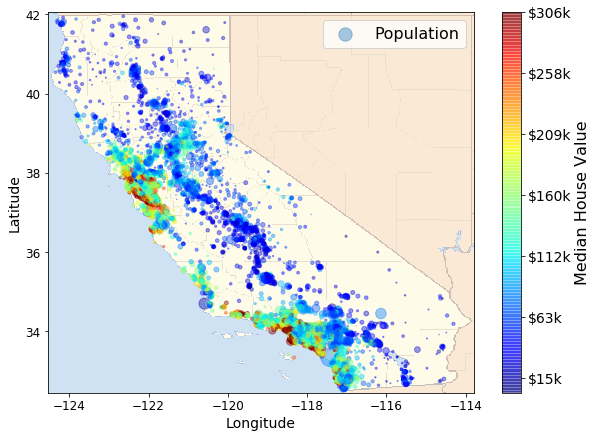

In [37]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()



In [38]:
# Looking for Correlations
# Since the dataset is not too large, you can easily compute the standard correlation
# coefficient (also called Pearson’s r) between every pair of attributes using the corr()
# method:


In [39]:
corr_matrix = housing.corr()

In [40]:
# Now let’s look at how much each attribute correlates with the median house value:

In [41]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [42]:
# Another way to check for correlation between attributes is to use Pandas’
# scatter_matrix function, which plots every numerical attribute against every other
# numerical attribute. Since there are now 11 numerical attributes, you would get 11 2 =121 plots,
# which would not fit on a page, so let’s just focus on a few promising
# attributes that seem most correlated with the median housing value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0096fbd6d0>,
      dtype=object)

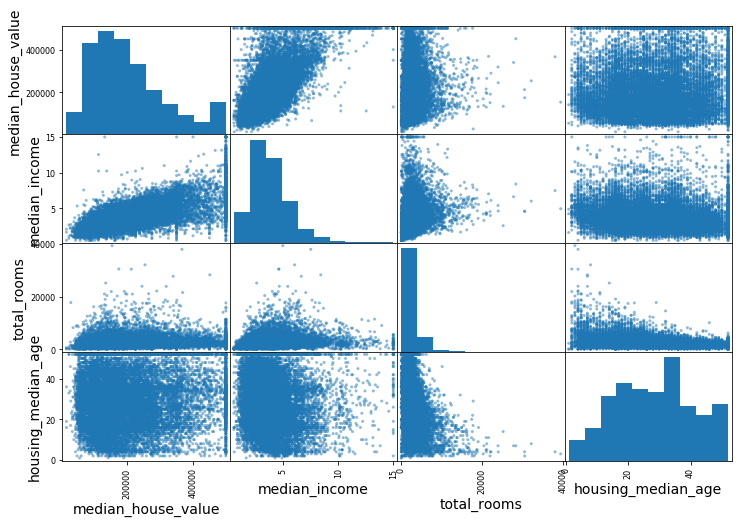

In [43]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [44]:
# The most promising attribute to predict the median house value is the median
# income, so let’s zoom in on their correlation scatterplot

[0, 16, 0, 550000]

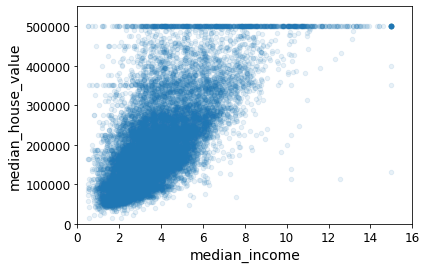

In [45]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [46]:
# This plot reveals a few things. First, the correlation is indeed very strong; you can
# clearly see the upward trend and the points are not too dispersed. Second, the price
# cap that we noticed earlier is clearly visible as a horizontal line at $500,000. But this
# plot reveals other less obvious straight lines: a horizontal line around $450,000,
# another around $350,000, perhaps one around $280,000, and a few more below that.
# You may want to try removing the corresponding districts to prevent your algorithms
# from learning to reproduce these data quirks.

# Experimenting with Attribute Combinations

In [47]:
# Hopefully the previous sections gave you an idea of a few ways you can explore the
# data and gain insights. You identified a few data quirks that you may want to clean up
# before feeding the data to a Machine Learning algorithm, and you found interesting
# correlations between attributes, in particular with the target attribute. You also
# noticed that some attributes have a tail-heavy distribution, so you may want to trans‐
# form them (e.g., by computing their logarithm). Of course, your mileage will vary
# considerably with each project, but the general ideas are similar.
# One last thing you may want to do before actually preparing the data for Machine
# Learning algorithms is to try out various attribute combinations. For example, the
# total number of rooms in a district is not very useful if you don’t know how many
# households there are. What you really want is the number of rooms per household.
# Similarly, the total number of bedrooms by itself is not very useful: you probably
# want to compare it to the number of rooms. And the population per household also
# seems like an interesting attribute combination to look at. Let’s create these new
# attributes:

In [48]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [49]:
# And now let’s look at the correlation matrix again:

In [50]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [51]:
# Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
# the median house value than the total number of rooms or bedrooms. Apparently
# houses with a lower bedroom/room ratio tend to be more expensive. The number of
# rooms per household is also more informative than the total number of rooms in a district
# — obviously the larger the houses, the more expensive they are.
# This round of exploration does not have to be absolutely thorough; the point is to
# start off on the right foot and quickly gain insights that will help you get a first rea‐
# sonably good prototype. But this is an iterative process: once you get a prototype up
# and running, you can analyze its output to gain more insights and come back to this
# exploration step.

In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the data for Machine Learning algorithms

In [53]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [54]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3


In [55]:
# Data Cleaning
# Most Machine Learning algorithms cannot work with missing features, so let’s create
# a few functions to take care of them. You noticed earlier that the total_bedrooms
# attribute has some missing values, so let’s fix this. You have three options:
# 1• Get rid of the corresponding districts.
# 2• Get rid of the whole attribute.
# 3• Set the values to some value (zero, the mean, the median, etc.).
# You can accomplish these easily using DataFrame’s dropna() , drop() , and fillna()
# methods:

In [56]:
# If you choose option 3, you should compute the median value on the training set, and
# use it to fill the missing values in the training set, but also don’t forget to save the
# median value that you have computed. You will need it later to replace missing values
# in the test set when you want to evaluate your system, and also once the system goes
# live to replace missing values in new data.

In [57]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [58]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3


In [59]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3


In [60]:
# Scikit-Learn provides a handy class to take care of missing values: Imputer . Here is
# how to use it. First, you need to create an Imputer instance, specifying that you want
# to replace each attribute’s missing values with the median of that attribute:

In [61]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [62]:
# Remove the text attribute because median can only be calculated on numerical attributes:

In [63]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [64]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [65]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [66]:
# Check that this is the same as manually computing the median of each attribute:

In [67]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [68]:
# Transform the training set:

In [69]:
X = imputer.transform(housing_num)

In [70]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [71]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,3.0


In [72]:
imputer.strategy

'median'

In [73]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0


In [74]:
# Now let's preprocess the categorical input feature, `ocean_proximity`:

In [75]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [76]:
#  It is now preferable to use the OneHotEncoder class over others such as Ordinal Encoder. Since Scikit-Learn 0.20 
# it can handle string categorical inputs (see PR #10521), 
# not just integer categorical inputs.

In [77]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [78]:
# By default, the `OneHotEncoder` class returns a sparse array, 
# but we can convert it to a dense array if needed by calling the `toarray()` method:

In [79]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [80]:
# Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [81]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [82]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [83]:
# Let's create a custom transformer to add extra attributes:

In [84]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

In [85]:
# Although Scikit-Learn provides many useful transformers, you will need to write
# your own for tasks such as custom cleanup operations or combining specific
# attributes. You will want your transformer to work seamlessly with Scikit-Learn func‐
# tionalities (such as pipelines), 

# and since Scikit-Learn relies on duck typing (not inheritance),

# All you need is to create a class and implement three methods: fit()
# (returning self ), transform() , and fit_transform() . You can get the last one for
# free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
# tor as a base class (and avoid *args and **kargs in your constructor) you will get
# two extra methods ( get_params() and set_params() ) that will be useful for auto‐
# matic hyperparameter tuning. For example, here is a small transformer class that adds
# the combined attributes we discussed earlier:

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [87]:
# In this example the transformer has one hyperparameter, add_bedrooms_per_room ,
# set to True by default (it is often helpful to provide sensible defaults). This hyperpara‐
# meter will allow you to easily find out whether adding this attribute helps the
# Machine Learning algorithms or not. More generally, you can add a hyperparameter
# to gate any data preparation step that you are not 100% sure about. The more you
# automate these data preparation steps, the more combinations you can automatically
# try out, making it much more likely that you will find a great combination (and sav‐
# ing you a lot of time).

In [88]:
# Alternatively, you can use Scikit-Learn's `FunctionTransformer` class that lets you easily create a transformer
# based on a transformation function. Note that we need to set `validate=False` because the data contains 
# non-float values (`validate` will default to `False` in Scikit-Learn 0.22).

In [89]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [90]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785


# Feature Scaling

In [91]:
# One of the most important transformations you need to apply to your data is feature
# scaling. With few exceptions, Machine Learning algorithms don’t perform well when
# the input numerical attributes have very different scales. This is the case for the hous‐
# ing data: the total number of rooms ranges from about 6 to 39,320, while the median
# incomes only range from 0 to 15. Note that scaling the target values is generally notrequired.

# There are two common ways to get all attributes to have the same scale: min-max
# scaling and standardization.

# Min-max scaling (many people call this normalization) is quite simple: values are
# shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐
# ing the min value and dividing by the max minus the min. Scikit-Learn provides a
# transformer called MinMaxScaler for this. It has a feature_range hyperparameter
# that lets you change the range if you don’t want 0–1 for some reason.

# Standardization is quite different: first it subtracts the mean value (so standardized
# values always have a zero mean), and then it divides by the variance so that the result‐
# ing distribution has unit variance. Unlike min-max scaling, standardization does not
# bound values to a specific range, which may be a problem for some algorithms (e.g.,
# neural networks often expect an input value ranging from 0 to 1). However, standard‐
# ization is much less affected by outliers. For example, suppose a district had a median
# income equal to 100 (by mistake). Min-max scaling would then crush all the other
# values from 0–15 down to 0–0.15, whereas standardization would not be much affec‐
# ted. Scikit-Learn provides a transformer called StandardScaler for standardization.
# As with all the transformations, it is important to fit the scalers to
# the training data only, not to the full dataset (including the test set).
# Only then can you use them to transform the training set and the
# test set (and new data).

# Transformation Pipelines

In [92]:
# As you can see, there are many data transformation steps that need to be executed in
# the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
# such sequences of transformations.

In [93]:
# The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
# steps. All but the last estimator must be transformers (i.e., they must have a
# fit_transform() method). The names can be anything you like.
# When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
# all transformers, passing the output of each call as the parameter to the next call, until
# it reaches the final estimator, for which it just calls the fit() method.
# The pipeline exposes the same methods as the final estimator. In this example, the last
# estimator is a StandardScaler , which is a transformer, so the pipeline has a trans
# form() method that applies all the transforms to the data in sequence (it also has a
# fit_transform method that we could have used instead of calling fit() and then
# transform() ).
# You now have a pipeline for numerical values, and you also need to apply the LabelBinarizer
# on the categorical values: how can you join these transformations into a sin‐
# gle pipeline? Scikit-Learn provides a FeatureUnion class for this. You give it a list of
# transformers (which can be entire transformer pipelines), and when its transform()
# method is called it runs each transformer’s transform() method in parallel, waits for
# their output, and then concatenates them and returns the result (and of course calling
# its fit() method calls all each transformer’s fit() method). A full pipeline handling
# both numerical and categorical attributes may look like this:

In [94]:
# Each subpipeline starts with a selector transformer: it simply transforms the data by
# selecting the desired attributes (numerical or categorical), dropping the rest, and con‐
# verting the resulting DataFrame to a NumPy array. There is nothing in Scikit-Learn
# to handle Pandas DataFrames, 20 so we need to write a simple custom transformer for
# this task:

In [95]:
# Now let's build a pipeline for preprocessing the numerical attributes 
# (note that we could use CombinedAttributesAdder() instead of FunctionTransformer(...) if we preferred):

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [97]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [98]:
#  earlier versions of the book applied different transformations to different columns using a
#     solution based on a DataFrameSelector transformer and a FeatureUnion (see below). 
#     It is now preferable to use the ColumnTransformer class that was introduced in Scikit-Learn 0.20.

In [99]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [100]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [101]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [102]:
housing_prepared.shape

(16512, 17)

# Select and train a model 

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]


In [105]:
# Compare against the actual values:

In [106]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [107]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.95445595, -0.31205452,
        -0.08649871,  0.15531753,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  1.89030518,  0.21768338,
        -0.03353391, -0.83628902,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.95445595, -0.46531516,
        -0.09240499,  0.4222004 ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.95445595, -0.07966124,
         0.08973561, -0.19645314,  0.        ,  1.        ,  0.        ,
         0.        

In [108]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [109]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49508.082059709115

In [ ]:
# Okay, this is better than nothing but clearly not a great score: most districts’
# median_housing_values range between $120,000 and $265,000, so a typical predic‐
# tion error of $68,376 is not very satisfying. This is an example of a model underfitting
# the training data. When this happens it can mean that the features do not provide
# enough information to make good predictions, or that the model is not powerful
# enough. 

# As we saw in the previous chapter, the main ways to fix underfitting are to
# select a more powerful model, to feed the training algorithm with better features, or
# to reduce the constraints on the model. This model is not regularized, so this rules
# out the last option. You could try to add more features (e.g., the log of the popula‐
# tion), but first let’s try a more complex model to see how it does.
# Let’s train a DecisionTreeRegressor . This is a powerful model, capable of finding
# complex nonlinear relationships in the data

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [111]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [ ]:
# Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
# it is much more likely that the model has badly overfit the data. How can you be sure?
# As we saw earlier, you don’t want to touch the test set until you are ready to launch a
# model you are confident about, so you need to use part of the training set for train‐
# ing, and part for model validation.

In [ ]:
# One way to evaluate the Decision Tree model would be to use the train_test_split
# function to split the training set into a smaller training set and a validation set, then
# train your models against the smaller training set and evaluate them against the vali‐
# dation set. It’s a bit of work, but nothing too difficult and it would work fairly well.
# A great alternative is to use Scikit-Learn’s cross-validation feature. The following code
# performs K-fold cross-validation: it randomly splits the training set into 10 distinct
# subsets called folds, then it trains and evaluates the Decision Tree model 10 times,
# picking a different fold for evaluation every time and training on the other 9 folds.
# The result is an array containing the 10 evaluation scores:

In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# Scikit-Learn cross-validation features expect a utility function
# (greater is better) rather than a cost function (lower is better), so
# the scoring function is actually the opposite of the MSE (i.e., a neg‐
# ative value), which is why the preceding code computes -scores
# before calculating the square root.

# Note: we specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change 
# to 100 in Scikit-Learn 0.22.

In [115]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70274.7991723  67258.3624668  71350.42593227 68882.91340979
 70987.99296566 74177.52037059 70788.57311306 70850.53018019
 76430.62239321 70212.6471067 ]
Mean: 71121.4387110585
Standard deviation: 2434.3080046605132


In [ ]:
# Now the decision tree performs worse than the linear regressor due to ovrfitting
# Let's compute the same for the linear regressor

In [116]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean: 68828.99948449328
Standard deviation: 2662.7615706103443


In [ ]:
# Let’s try one last model now: the RandomForestRegressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [122]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22107.0888400092

In [123]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51481.61843757 48867.18698326 53592.93924497 54917.35753217
 50463.39403515 56776.52132037 51940.08691385 50521.84102811
 55729.5024898  53136.5656865 ]
Mean: 52742.701367175265
Standard deviation: 2412.0829538615826


In [124]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68828.999484
std       2806.797143
min      64782.658966
25%      67078.972952
50%      67699.468929
75%      70954.281428
max      74179.947994
dtype: float64